# Explore difference between PHONEIX-ACES two spectra of incremental temperature

#### Aim:
In this Notebook I explore the differences in the combined models when there are incremental changes of one component.

For example. The difference between a model with I_host([5200, 4.50, 0.0]) and companions I_companion([2500, 4.5, 0.0]) and I_companion([2600, 4.5, 0.0]). Where the temperature changes by 100K (one model grid step)

####Method:
Create combined spectral models, that differ in grid parameters incremented by 1 step (all else fixed). Take the difference between the two and analsyse the differences. In this case we take the mean difference and the standard deviation and see how these change for different host and companion parameters.

At this stage just for a single radial velocity point of both components. 


#### Results:
For now this is with a fixed radial velocity of each component=0. Possibly this will be bigger if offset.

The Trends:
Host differences:
   - Teff -
   - logg -
   - feh -

Companion differences:
   - Teff -
   - logg -
   - feh -


The small difference in companion parametes make it harder to distinguish the correct parameters. The shape of $\chi**2$ will be shallower. We see this for companion radial velocity were there is not a clear minimum and large error bars.



In [1]:
from simulators.iam_module import prepare_iam_model_spectra, continuum_alpha, continuum, inherent_alpha_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Spectrum():
    pass

In [3]:
fudge=None
obs_spec = Spectrum()
obs_spec.xaxis = np.linspace(2110, 2130, 1000)
chip = 1
def combine_spectrum(params1, params2, rvs, gammas, plot=True):
    # Load phoenix models and scale by area and wavelength limit
    mod1_spec, mod2_spec = prepare_iam_model_spectra(params1, params2, limits=[2110, 2130],
                                                  area_scale=True, wav_scale=True)

    inherent_alpha = continuum_alpha(mod1_spec, mod2_spec, chip)
    
   
    # Combine model spectra with iam model
    if plot:
        plt_spec = mod1_spec.copy()
        plt_spec2 = mod2_spec.copy()
        max_host = np.max(plt_spec.flux)
        ax = plt.plot()
        plt_spec /= max_host 
        plt_spec2 /= max_host
        plt_spec.plot(label=params1)
        plt_spec2.plot(label=params2)
        SNR = 500 
        std_noise = np.random.normal(0, np.ones_like(plt_spec.xaxis)/SNR)
        plt.plot(plt_spec.xaxis, std_noise, label="Noise with std=1/{}".format(SNR))
        plt.title("Spectra before combination\n (Scaled by area already)")
        plt.ylabel("Normalzied flux (peak host)")
        plt.legend()
        plt.show()
        
    
    if fudge or (fudge is not None):
                fudge_factor = float(fudge)
                mod2_spec.flux *= fudge_factor  # fudge factor multiplication
                mod2_spec.plot(label="fudged {0}".format(params2))
                plt.title("fudges models")
                plt.legend()
                warnings.warn("Using a fudge factor = {0}".format(fudge_factor))

    iam_grid_func = inherent_alpha_model(mod1_spec.xaxis, mod1_spec.flux, mod2_spec.flux,
                                                 rvs=rvs, gammas=gammas)
    iam_grid_models = iam_grid_func(obs_spec.xaxis)
            
    iam_grid_models = iam_grid_func(obs_spec.xaxis)

    # Continuum normalize all iam_gird_models
    def axis_continuum(flux):
        """Continuum to apply along axis with predefined variables parameters."""
        return continuum(obs_spec.xaxis, flux, splits=20, method="exponential", top=5)

    iam_grid_continuum = np.apply_along_axis(axis_continuum, 0, iam_grid_models)

    iam_grid_models = iam_grid_models / iam_grid_continuum
    
    return iam_grid_models

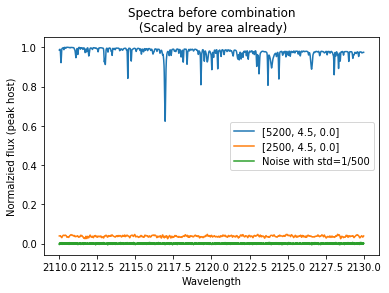

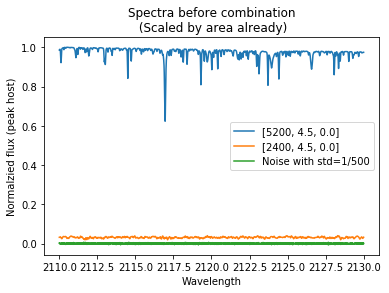

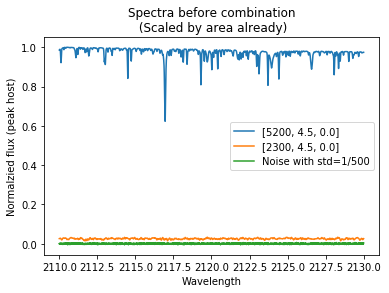

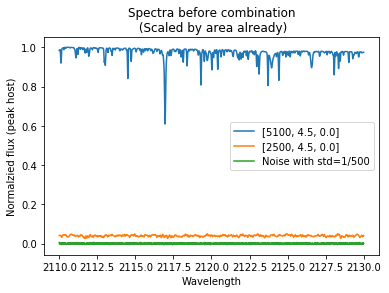

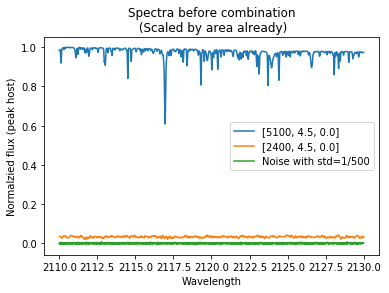

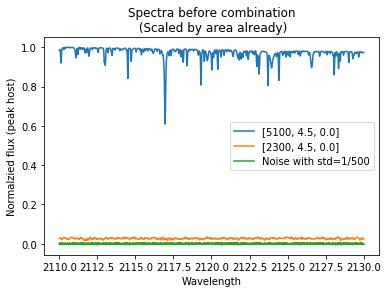

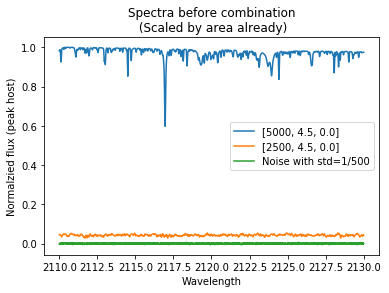

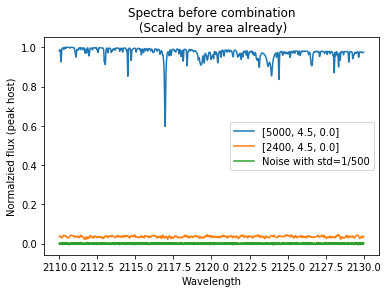

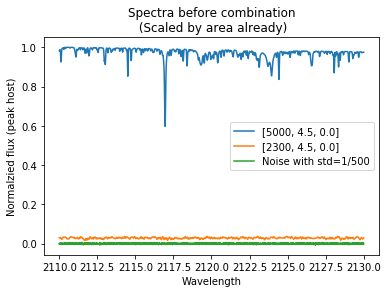

No handles with labels found to put in legend.


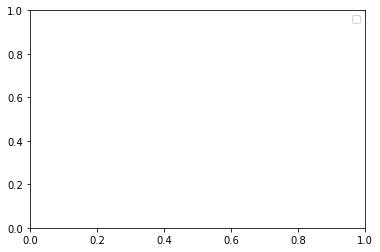

In [4]:
host1 = [5200, 4.5, 0.0]
host2 = [5100, 4.5, 0.0]
host3 = [5000, 4.5, 0.0]
comp1 = [2500, 4.5, 0.0]
comp2 = [2400, 4.5, 0.0]
comp3 = [2300, 4.5, 0.0]
rvs = [0]
gammas = [0]

model11 = combine_spectrum(host1, comp1, rvs, gammas).squeeze()
model12 = combine_spectrum(host1, comp2, rvs, gammas).squeeze()
model13 = combine_spectrum(host1, comp3, rvs, gammas).squeeze()
model21 = combine_spectrum(host2, comp1, rvs, gammas).squeeze()
model22 = combine_spectrum(host2, comp2, rvs, gammas).squeeze()
model23 = combine_spectrum(host2, comp3, rvs, gammas).squeeze()
model31 = combine_spectrum(host3, comp1, rvs, gammas).squeeze()
model32 = combine_spectrum(host3, comp2, rvs, gammas).squeeze()
model33 = combine_spectrum(host3, comp3, rvs, gammas).squeeze()
# print(model22.shape)
plt.legend()


In [5]:
def plot_components(params1, params2, rvs, gammas, plot=True, snr=500):
    # Load phoenix models and scale by area and wavelength limit
    mod1_spec, mod2_spec = prepare_iam_model_spectra(params1, params2, limits=[2110, 2130],
                                                  area_scale=True, wav_scale=True)

    inherent_alpha = continuum_alpha(mod1_spec, mod2_spec, chip)
    
    # Combine model spectra with iam model
    if plot:
        plt_spec = mod1_spec.copy()
        plt_spec2 = mod2_spec.copy()
        max_host = np.median(plt_spec.flux)
        ax = plt.plot()
        plt_spec /= max_host 
        plt_spec2 /= max_host
        plt_spec.plot(label=params1)
        plt_spec2.plot(label=params2)
        
        std_noise = np.random.normal(0.5, np.ones_like(plt_spec.xaxis)/snr)
                         
        plt.plot(plt_spec.xaxis, std_noise, label="Noise with std=1/{} (offset)".format(snr))
        plt.title("Spectra before combination\n (Scaled by emited area)")
        plt.ylabel("Normalzied flux (peak host)")
        plt.xlim([2110, 2120])
        plt.legend(loc=5)
        #plt.ylim([0,1.3])
        plt.show()

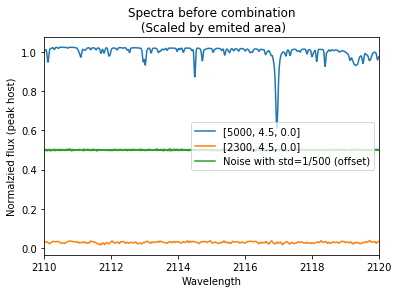

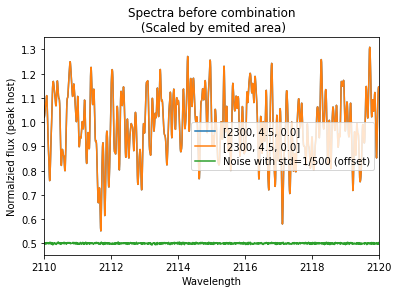

std of companion spectrum 0.125167237098
std of companion spectrum 0.75793826089


In [6]:
plot_components(host3, comp3, rvs, gammas, snr=500)
plot_components(comp3, comp3, rvs, gammas, snr=500)


# Standard devition of median normalized spectrum of companion
mod1_spec, mod2_spec = prepare_iam_model_spectra(host3, comp3, limits=[2110, 2130],
                                                  area_scale=True, wav_scale=True)

print("std of companion spectrum", np.std(mod2_spec.flux/np.median(mod2_spec.flux)-1))
print("std of companion spectrum", (np.max(mod2_spec.flux)- np.min(mod2_spec.flux))/np.median(mod2_spec.flux))


Very little difference


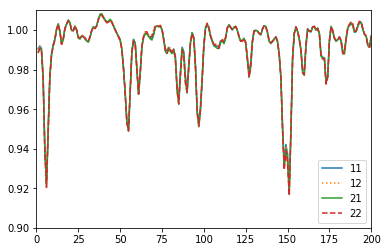

In [7]:
print("Very little difference")
plt.plot(model11, label="11")
plt.plot(model12,":", label="12")
plt.plot(model21,  label="21")
plt.plot(model22, "--", label="22")
plt.legend()
plt.ylim([.9, 1.01])
plt.xlim(0,200)
plt.show()


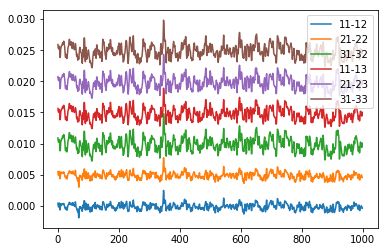

In [8]:
plt.plot(model11-model12, label="11-12")
plt.plot(model21-model22 + 0.005 , label="21-22")
plt.plot(model31-model33 + 0.010, label="31-32")
plt.plot(model11-model13 + 0.015, label="11-13")
plt.plot(model21-model23 + 0.02 , label="21-23")
plt.plot(model31-model33 + 0.025, label="31-33")

plt.legend()
plt.show()


In [9]:
stat = lambda x: (np.nanmean(x), np.nanstd(x))

print("Same host teff, companion spectra changes teff 100K")
print("comp = 5200")
print("diff mean {0:5.05f}, std {1:5.05f}".format(*stat(model11-model12)))

print("comp = 5100")
print("diff mean {0:5.05f}, std {1:5.05f}".format(*stat(model21-model22)))


# Same comp temperature, companion changes by teff 100K
print("comp = 2500")
print("diff mean {0:5.05f}, std {1:5.05f}".format(*stat(model11-model21)))

print("comp = 2400")
print("diff mean {0:5.05f}, std {1:5.05f}".format(*stat(model12-model22)))


Same host teff, companion spectra changes teff 100K
comp = 5200
diff mean -0.00012, std 0.00046
comp = 5100
diff mean -0.00012, std 0.00050
comp = 2500
diff mean 0.00048, std 0.00162
comp = 2400
diff mean 0.00049, std 0.00164


## Plots

In [10]:
linestyle = ["-", "--", "-."]

# Tempetature Changes

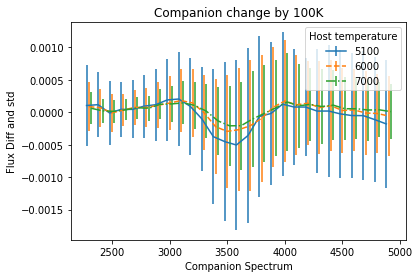

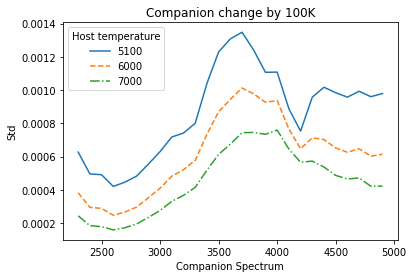

In [11]:
offset = [-20, 0, 20]

def diff_comp100(params1, params2):
    """Differnece in parameters when param2teff changes bu +100"""
    rvs = [0]
    gammas = [0]
    params_new = [params2[0]+100, *params2[1:]]
    s1 = combine_spectrum(params1, params2, rvs, gammas, plot=False).squeeze()
    s2 = combine_spectrum(params1, params_new, rvs, gammas, plot=False).squeeze()
    diff = s1-s2
    return diff

# Make plots of t
host =  [5100, 6000, 7000]
comp = np.arange(2300, 5000, 100)

for i, hteff in enumerate(host):
    cmp_mean = []
    cmp_std = []
    for comp_teff in comp: 
        diff = diff_comp100([hteff, 4.5, 0.0], [comp_teff, 4.5, 0.0])
        mean, std = stat(diff)
        cmp_mean.append(mean)
        cmp_std.append(std)
    # print(len(comp), len(cmp_mean), len(cmp_std))
    plt.errorbar(comp+offset[i], cmp_mean, cmp_std , label=hteff, linestyle=linestyle[i])

plt.legend(title="Host temperature")
plt.ylabel("Flux Diff and std")
plt.xlabel("Companion Spectrum")
plt.title("Companion change by 100K")
plt.show()

for i, hteff in enumerate(host):
    cmp_mean = []
    cmp_std = []
    for comp_teff in comp: 
        diff = diff_comp100([hteff, 4.5, 0.0], [comp_teff, 4.5, 0.0])
        mean, std = stat(diff)
        cmp_mean.append(mean)
        cmp_std.append(std)
    # print(len(comp), len(cmp_mean), len(cmp_std))
    plt.plot(comp, cmp_std , label=hteff, linestyle=linestyle[i])

plt.legend(title="Host temperature")
plt.ylabel("Std")
plt.xlabel("Companion Spectrum")
plt.title("Companion change by 100K")
plt.show()

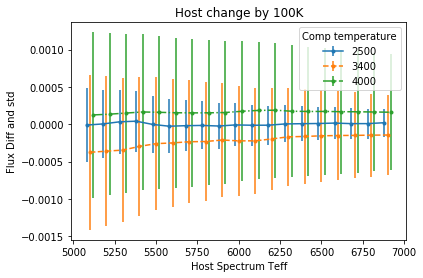

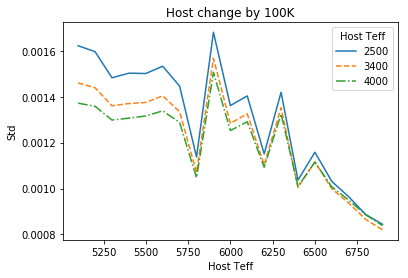

In [12]:
def diff_host100(params1, params2):
    """Differnece in parameters when param2teff changes bu +100"""
    rvs = [0]
    gammas = [0]
    params_new = [params1[0]+100, *params1[1:]]
    s1 = combine_spectrum(params1, params2, rvs, gammas, plot=False).squeeze()
    s2 = combine_spectrum(params_new, params2, rvs, gammas, plot=False).squeeze()
    diff = s1-s2
    return diff

# Make plots of t
comp =  [2500, 3400, 4000]
host = np.arange(5100, 7000, 100)

for i, cteff in enumerate(comp):
    host_mean = []
    host_std = []
    for hteff in host: 
        diff = diff_comp100([hteff, 4.5, 0.0], [cteff, 4.5, 0.0])
        mean, std = stat(diff)
        host_mean.append(mean)
        host_std.append(std)
    # print(len(comp), len(cmp_mean), len(cmp_std))
    plt.errorbar(host+offset[i], host_mean, host_std , label=cteff, ls=linestyle[i], marker=".")

plt.legend(title="Comp temperature")
plt.ylabel("Flux Diff and std")
plt.xlabel("Host Spectrum Teff")
plt.title("Host change by 100K")
plt.show()

for i, cteff in enumerate(comp):
    host_mean = []
    host_std = []
    for hteff in host: 
        diff = diff_host100([hteff, 4.5, 0.0], [cteff, 4.5, 0.0])
        mean, std = stat(diff)
        host_mean.append(mean)
        host_std.append(std)
    plt.plot(host, host_std , label=cteff, ls=linestyle[i], ms=3)

plt.legend(title="Host Teff")
plt.ylabel("Std")
plt.xlabel("Host Teff")
plt.title("Host change by 100K")
plt.show()

I do not know why there is a large spike at 5000 for the companion.

# Logg change


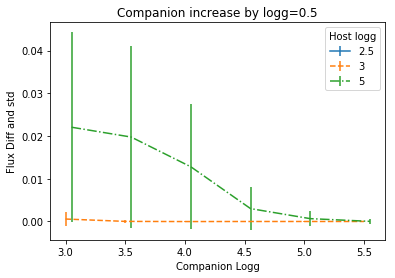

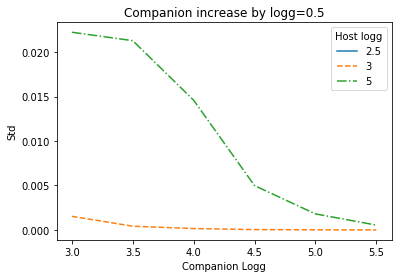

In [13]:
offset = [-0.05, 0, 0.05]

def diff_complogg(params1, params2):
    """Differnece in parameters when param2teff changes bu +100"""
    rvs = [0]
    gammas = [0]
    params_new = [params2[0], params2[1]+0.5, params2[2]]
    s1 = combine_spectrum(params1, params2, rvs, gammas, plot=False).squeeze()
    s2 = combine_spectrum(params1, params_new, rvs, gammas, plot=False).squeeze()
    diff = s2-s1
    return diff

# Make plots of t
host =  [2.5, 3, 5]
comp = np.arange(2.5, 6, 0.5)

for i, hlogg in enumerate(host):
    cmp_mean = []
    cmp_std = []
    for clogg in comp: 
        try:
            diff = diff_complogg([6000, hlogg, 0.0], [2500, clogg, 0.0])
            mean, std = stat(diff)
            cmp_mean.append(mean)
            cmp_std.append(std)
        except:
            cmp_mean.append(np.nan)
            cmp_std.append(np.nan)
    # print(len(comp), len(cmp_mean), len(cmp_std))
    plt.errorbar(comp+offset[i], cmp_mean, cmp_std , label=hlogg, linestyle=linestyle[i])
plt.legend(title="Host logg")
plt.ylabel("Flux Diff and std")
plt.xlabel("Companion Logg")
plt.title("Companion increase by logg=0.5")
plt.show()


for i, hlogg in enumerate(host):
    cmp_mean = []
    cmp_std = []
    for clogg in comp: 
        try:
            diff = diff_complogg([6000, hlogg, 0.0], [2500, clogg, 0.0])
            mean, std = stat(diff)
            cmp_mean.append(mean)
            cmp_std.append(std)
        except:
            cmp_mean.append(np.nan)
            cmp_std.append(np.nan)
    # print(len(comp), len(cmp_mean), len(cmp_std))
    plt.plot(comp, cmp_std , label=hlogg, linestyle=linestyle[i])
plt.legend(title="Host logg")
plt.ylabel("Std")
plt.xlabel("Companion Logg")
plt.title("Companion increase by logg=0.5")
plt.show()

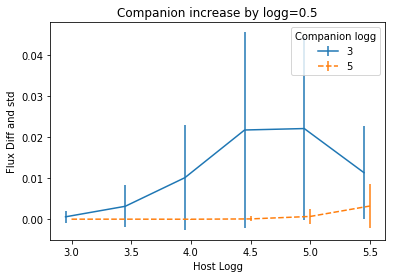

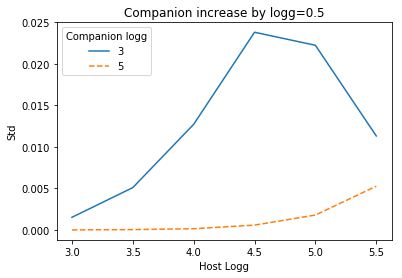

In [14]:
def diff_hostlogg(params1, params2):
    """Differnece in parameters when param2teff changes bu +100"""
    rvs = [0]
    gammas = [0]
    s1 = combine_spectrum(params1, params2, rvs, gammas, plot=False).squeeze()
    params_new = [params1[0], params1[1]+0.5, params1[2]]
    s2 = combine_spectrum(params_new, params2, rvs, gammas, plot=False).squeeze()
    diff = s2-s1
    return diff

# Make plots of t
comp =  [ 3, 5]
host = np.arange(3, 6, 0.5)

for i, clogg in enumerate(comp):
    host_mean = []
    host_std = []
    for hlogg in host: 
        diff = diff_complogg([6000, hlogg, 0.0], [2500, clogg, 0.0])
        mean, std = stat(diff)
        host_mean.append(mean)
        host_std.append(std)
    # print(len(host), len(host_mean), len(host_std))
    plt.errorbar(host+offset[i], host_mean, host_std , label=clogg, linestyle=linestyle[i])
plt.legend(title="Companion logg")
plt.ylabel("Flux Diff and std")
plt.xlabel("Host Logg")
plt.title("Companion increase by logg=0.5")
plt.show()


for i, clogg in enumerate(comp):
    host_mean = []
    host_std = []
    for hlogg in host: 
        diff = diff_complogg([6000, hlogg, 0.0], [2500, clogg, 0.0])
        mean, std = stat(diff)
        host_mean.append(mean)
        host_std.append(std)
    plt.plot(host, host_std , label=clogg, linestyle=linestyle[i])
plt.legend(title="Companion logg")
plt.ylabel("Std")
plt.xlabel("Host Logg")
plt.title("Companion increase by logg=0.5")
plt.show()


# Feh changes


8 8 8
8 8 8
8 8 8


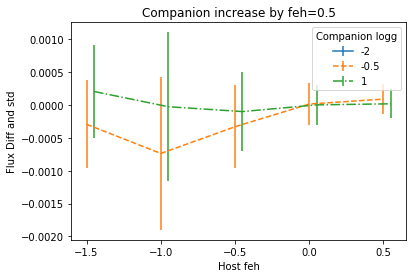

8 8 8
8 8 8
8 8 8


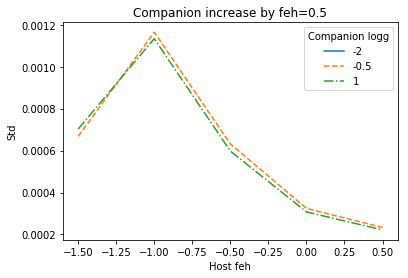

In [16]:
def diff_compfeh(params1, params2):
    """Differnece in parameters when param2teff changes bu +100"""
    rvs = [0]
    gammas = [0]
    s1 = combine_spectrum(params1, params2, rvs, gammas, plot=False).squeeze()
    params_new = [params2[0], params2[1], params2[2]+0.5]
    s2 = combine_spectrum(params1, params_new, rvs, gammas, plot=False).squeeze()
    diff = s2 - s1
    return diff

# Make plots of t
host =  [-2, -0.5, 1]
comp = np.arange(-2.5, 1.5, 0.5)

for i, hfeh in enumerate(host):
    comp_mean = []
    comp_std = []
    for cfeh in comp: 
        try:
            diff = diff_compfeh([6000, 4.5, hfeh], [2500, 4.5, cfeh])
            mean, std = stat(diff)
            comp_mean.append(mean)
            comp_std.append(std)
        except:
            comp_mean.append(np.nan)
            comp_std.append(np.nan)
    print(len(comp), len(comp_mean), len(comp_std))
    plt.errorbar(comp+offset[i], comp_mean, comp_std , label=hfeh, linestyle=linestyle[i])
plt.legend(title="Companion logg")
plt.ylabel("Flux Diff and std")
plt.xlabel("Host feh")
plt.title("Companion increase by feh=0.5")
plt.show()


for i, hfeh in enumerate(host):
    comp_mean = []
    comp_std = []
    for cfeh in comp: 
        try:
            diff = diff_compfeh([6000, 4.5, hfeh], [2500, 4.5, cfeh])
            mean, std = stat(diff)
            comp_mean.append(mean)
            comp_std.append(std)
        except:
            comp_mean.append(np.nan)
            comp_std.append(np.nan)
    print(len(comp), len(comp_mean), len(comp_std))
    plt.errorbar(comp, comp_std , label=hfeh, linestyle=linestyle[i])
plt.legend(title="Companion logg")
plt.ylabel("Std")
plt.xlabel("Host feh")
plt.title("Companion increase by feh=0.5")
plt.show()

8 8 8
8 8 8
8 8 8


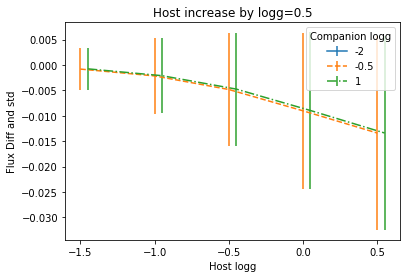

8 8 8
8 8 8
8 8 8


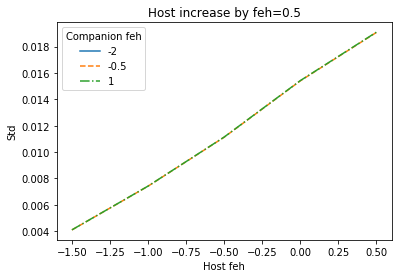

In [17]:

def diff_hostfeh(params1, params2):
    """Differnece in parameters when param2 teff changes by +100"""
    rvs = [0]
    gammas = [0]
    s1 = combine_spectrum(params1, params2, rvs, gammas, plot=False).squeeze()
    params_new = [params1[0], params1[1], params1[2]+0.5]
    s2 = combine_spectrum(params_new, params2, rvs, gammas, plot=False).squeeze()
    diff = s2 - s1
    return diff

# Make plots of t
comp =  [-2, -0.5, 1]
host = np.arange(-2.5, 1.5, 0.5)

for i, cfeh in enumerate(comp):
    host_mean = []
    host_std = []
    for hfeh in host: 
        try:
            diff = diff_hostfeh([6000, 4.5, hfeh], [2500, 4.5, cfeh])
            mean, std = stat(diff)
            host_mean.append(mean)
            host_std.append(std)
        except:
            host_mean.append(np.nan)
            host_std.append(np.nan)
    print(len(host), len(host_mean), len(host_std))
    plt.errorbar(host+offset[i], host_mean, host_std, label=cfeh, linestyle=linestyle[i])
plt.legend(title="Companion logg")
plt.ylabel("Flux Diff and std")
plt.xlabel("Host logg")
plt.title("Host increase by logg=0.5")
plt.show()


for i, cfeh in enumerate(comp):
    host_mean = []
    host_std = []
    for hfeh in host: 
        try:
            diff = diff_hostfeh([6000, 4.5, hfeh], [2500, 4.5, cfeh])
            mean, std = stat(diff)
            host_mean.append(mean)
            host_std.append(std)
        except:
            host_mean.append(np.nan)
            host_std.append(np.nan)
    print(len(host), len(host_mean), len(host_std))
    plt.errorbar(host, host_std, label=cfeh, linestyle=linestyle[i])
plt.legend(title="Companion feh")
plt.ylabel("Std")
plt.xlabel("Host feh")
plt.title("Host increase by feh=0.5")
plt.show()


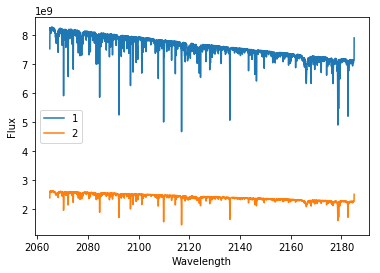

In [19]:
mod1_spec, mod2_spec = prepare_iam_model_spectra([5000, 4.5, 0.0], [5000, 5., 0.0], limits=[2010, 2430],
                                                  area_scale=True, wav_scale=True)

mod1_spec.plot(label="1")
mod2_spec.plot(label="2")
plt.legend()
plt.show()